tl;dr $\pi$, $e$

In [2]:
import pandas as pd

In [3]:
df = pd.read_excel('data/test_data_3.xlsx')

In [4]:
df.describe()

,x,y,z
count,100.000000,100.000000,100.000000
mean,0.497771,0.433649,65.274473
std,0.300166,0.289755,33.899934
min,0.011849,0.001435,23.828856
25%,0.243079,0.152492,39.911145
50%,0.479194,0.430749,52.583703
75%,0.747367,0.679205,85.106904
max,0.971995,0.995765,188.713996


Можно применить грубый оптимизационный подход: из $z$ вычесть матожидание $\epsilon$ (0.05), чтобы иметь дело с функцией регрессии (уже без упоминания эпсилон), взять функцию потерь (MSE) и пройтись по ней градиентным спуском. Исходная функция выглядит конвексно (композиция конвексной нормы от векторной функции, каждая скалярная функция-элемент которой возрастает по аргументам и сама конвексна). Конвексность гарантирует, что локальный минимум является глобальным.

In [6]:
def grad1(x: np.ndarray,
         y: np.ndarray,
         z: np.ndarray,
         a: float,
         b: float) -> np.ndarray:
    grad1 = np.stack([(b+y)*np.power(a+x, b+y-1),
                      np.log(b+y)*np.power(a+x, b+y)])
    f = np.power(a+x, b+y)
    res = 2*grad1 @ (f - z) / x.shape[0]
    return res / np.sqrt(res @ res) 

def mse_loss1(x,y,z,a,b):
    return np.mean((np.power(a+x, b+y)-z)**2)

In [5]:
x,y,z = df.x.values, df.y.values, df.z.values-0.05

In [32]:
param = np.array([5.,5.])
lr = 0.01
loss_hist = []

for i in range(1000):
    g = grad1(x,y,z,*param)
    param -= lr*g
    loss = mse_loss1(x,y,z,*param)
    
    loss_hist.append(loss)
    print(f'{i}: mse: {loss:.3f}, [a,b]: {param[0]:.3f}, {param[1]:.3f}')
    
    if np.abs(loss)<1e-3:
        print('getting close')
        break
        

0: mse: 214065306.167, [a,b]: 4.995, 4.991
1: mse: 205601271.076, [a,b]: 4.990, 4.983
2: mse: 197475444.636, [a,b]: 4.985, 4.974
3: mse: 189674164.544, [a,b]: 4.980, 4.965
4: mse: 182184326.354, [a,b]: 4.975, 4.957
5: mse: 174993360.465, [a,b]: 4.970, 4.948
6: mse: 168089210.065, [a,b]: 4.965, 4.939
7: mse: 161460309.989, [a,b]: 4.960, 4.931
8: mse: 155095566.465, [a,b]: 4.955, 4.922
9: mse: 148984337.695, [a,b]: 4.950, 4.913
10: mse: 143116415.254, [a,b]: 4.945, 4.905
11: mse: 137482006.248, [a,b]: 4.940, 4.896
12: mse: 132071716.230, [a,b]: 4.935, 4.887
13: mse: 126876532.812, [a,b]: 4.930, 4.879
14: mse: 121887809.967, [a,b]: 4.925, 4.870
15: mse: 117097252.976, [a,b]: 4.920, 4.861
16: mse: 112496904.003, [a,b]: 4.915, 4.853
17: mse: 108079128.271, [a,b]: 4.910, 4.844
18: mse: 103836600.805, [a,b]: 4.905, 4.836
19: mse: 99762293.728, [a,b]: 4.900, 4.827
20: mse: 95849464.084, [a,b]: 4.895, 4.818
21: mse: 92091642.161, [a,b]: 4.890, 4.810
22: mse: 88482620.306, [a,b]: 4.885, 4.801
23

In [33]:
param

array([3.14112229, 2.71603745])

С учетом эстетического приора на загаданные значения, приходим к ответу ($\pi$, $e$) 

Так как задача игрушечная, в иллюстративно-эстетических целях можно изобразить рельеф функции

In [6]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
plt.style.use('seaborn-v0_8-darkgrid')

In [5]:
grid = np.meshgrid(np.linspace(1,10,1000),
                   np.linspace(1,10,1000))

In [27]:
def f(a,b,x,y,z):
    return np.mean((np.power(a+x, b+y)-z)**2, axis=-1)

def f2(a,b,x,y,z):
    return np.mean(((b+y)*np.log(a+x)-np.log(z))**2, axis=-1)

In [8]:
grid = np.meshgrid(np.linspace(1,10,1000),
                   np.linspace(1,10,1000))

In [11]:
val = f(grid[0][...,None], grid[1][...,None],x,y,z-0.05)

In [ ]:
optim = ( 
    np.concatenate([
        grid[0][...,None], 
        grid[1][...,None]
        ], axis=-1)
        .reshape(-1,2)
        [np.argmin(val)]
)
optim

array([3.13513514, 2.72072072])

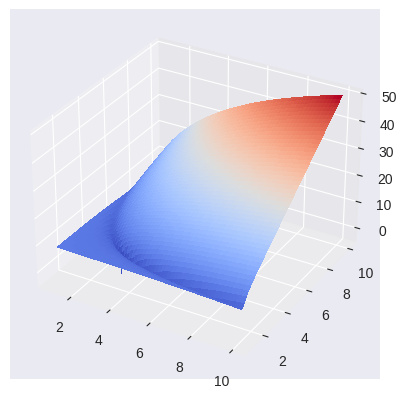

In [22]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(grid[0], grid[1], np.log(val), cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

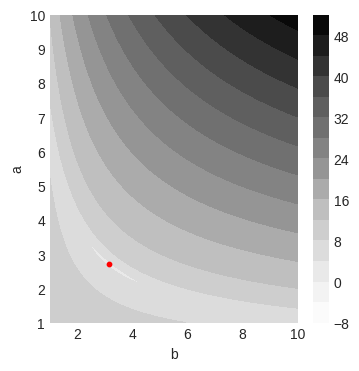

In [23]:
fig, ax = plt.subplots(figsize=(4,4))
cf = ax.contourf(grid[0], grid[1], np.log(val), levels=15)
ax.set_ylabel('a')
ax.set_xlabel('b')
fig.colorbar(cf)
ax.scatter(*optim, s=10, c='r')

In [28]:
val2 = f2(grid[0][...,None], grid[1][...,None],x,y,z)

In [29]:
optim2 = ( 
    np.concatenate([
        grid[0][...,None], 
        grid[1][...,None]
        ], axis=-1)
        .reshape(-1,2)
        [np.argmin(val2)]
)
optim2

array([3.13513514, 2.72072072])

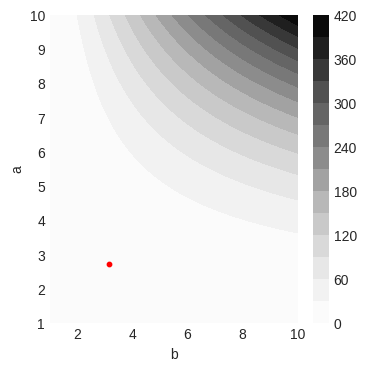

In [34]:
fig, ax = plt.subplots(figsize=(4,4))
cf = ax.contourf(grid[0], grid[1], val2, levels=15)
ax.set_ylabel('a')
ax.set_xlabel('b')
fig.colorbar(cf)
ax.scatter(*optim2, s=10, c='r')

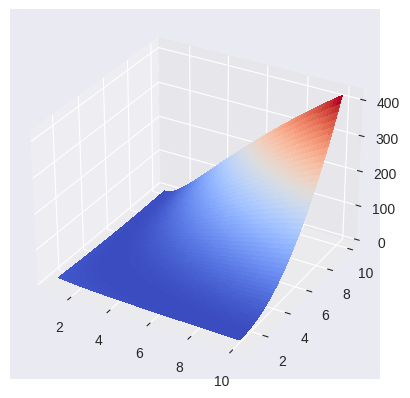

In [30]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(grid[0], grid[1], val2, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

In [35]:
f(*optim, x,y,z), f2(*optim2, x,y,z) 

(np.float64(0.005681328284398745), np.float64(1.3554007737952732e-06))

Более элегантно было бы вывести распределение композиции исходных случайных переменных и затем взять MLE/MAP от того, что получилось.
Исходные переменные можно угадать ($x \sim U[0,1]$, $y \sim Beta(0.75,1)$), но внятную композицию я не вывел (там непокорные мне интегралы)

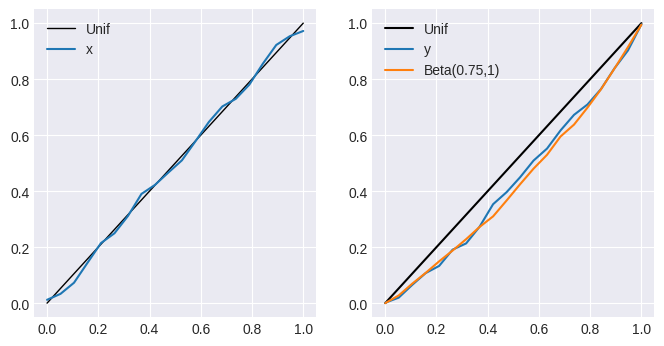

In [10]:
quantiles = np.linspace(0,1, 20)
q = np.quantile(x, quantiles)
fig,ax = plt.subplots(1,2,figsize=(8,4))
ax[0].plot([0,1], [0,1], c='k', lw=1)
ax[0].plot(quantiles, q);
ax[0].legend(['Unif', 'x'])

q1 = np.quantile(y, quantiles)
q2 = np.quantile(np.random.beta(0.75, 1, 500), quantiles)

ax[1].plot([0,1], [0,1], c='k')
ax[1].plot(quantiles, q1)
ax[1].plot(quantiles, q2)
ax[1].legend(['Unif', 'y', 'Beta(0.75,1)']);